In [9]:
#pip install libpysal

In [95]:
import numpy as np

In [96]:
import libpysal as lps

In [97]:
import pandas as pd

In [98]:
import geopandas as gpd

In [99]:
import matplotlib.pyplot as plt

In [100]:
from shapely.geometry import Point, Polygon

In [101]:
import os

In [102]:
os.getcwd()

'/Users/emilmella/Downloads/lab9_Spatial_Analysis_Python'

In [103]:
os.chdir("/Users/emilmella/Downloads/lab9_Spatial_Analysis_Python")

In [104]:
flood = pd.read_csv("./mhhw_slosh_sample.csv")
asess = pd.read_csv("./oc_assessor_data.csv")
value = pd.read_csv("./prop_val_sample_oc.csv")

In [105]:
flood.head()

,id,c1_high,c2_high,c3_high,c4_high,water_diff
0,1,1.4,3.7,13.8,18.0,-15.08371
1,2,1.4,3.7,13.8,18.0,-15.08371
2,3,99.9,99.9,4.6,9.1,22.71174
3,4,99.9,99.9,4.6,9.1,22.71174
4,5,99.9,99.9,4.6,9.1,22.71174


In [106]:
asess.head()

,fsid,tractfp,arealotacres,areabuilding,bedroomscount,yearbuilt,unitscount,beachprox,fld_zone,near_golf,singfam,x,y
0,240472086092,24047950600,0.213728,1133,0,1984,1,1,AE,0,1,-75.138926,38.392017
1,240472086093,24047950600,0.223829,864,0,1978,1,0,X,1,1,-75.165920,38.382856
2,240472086097,24047951100,0.172176,1148,0,1990,1,0,X,0,1,-75.162869,38.366041
3,240472086099,24047950700,0.352479,2104,0,1999,1,0,X,1,1,-75.177478,38.395347
4,240472086101,24047950600,0.232140,1120,0,1975,1,1,X,0,1,-75.154435,38.396616


In [107]:
value.head()

,pr_sq_ft,fsid,saleyear,x,y,samp_pr05
0,436.451898,240472086092,2005,-75.138926,38.392017,312.131985
1,436.451898,240472086092,2005,-75.138926,38.392017,312.131985
2,225.694444,240472086093,2006,-75.165920,38.382856,187.126827
3,124.710648,240472086093,2011,-75.165920,38.382856,187.126827
4,124.710648,240472086093,2011,-75.165920,38.382856,187.126827


In [108]:
working = pd.concat([flood, value], axis = 1)

In [109]:
working.head()

,id,c1_high,c2_high,c3_high,c4_high,water_diff,pr_sq_ft,fsid,saleyear,x,y,samp_pr05
0,1,1.4,3.7,13.8,18.0,-15.08371,436.451898,240472086092,2005,-75.138926,38.392017,312.131985
1,2,1.4,3.7,13.8,18.0,-15.08371,436.451898,240472086092,2005,-75.138926,38.392017,312.131985
2,3,99.9,99.9,4.6,9.1,22.71174,225.694444,240472086093,2006,-75.165920,38.382856,187.126827
3,4,99.9,99.9,4.6,9.1,22.71174,124.710648,240472086093,2011,-75.165920,38.382856,187.126827
4,5,99.9,99.9,4.6,9.1,22.71174,124.710648,240472086093,2011,-75.165920,38.382856,187.126827


In [110]:
full = working.merge(asess, on='fsid', how='left')

In [111]:
full.head()

,id,c1_high,c2_high,c3_high,c4_high,water_diff,pr_sq_ft,fsid,saleyear,x_x,...,areabuilding,bedroomscount,yearbuilt,unitscount,beachprox,fld_zone,near_golf,singfam,x_y,y_y
0,1,1.4,3.7,13.8,18.0,-15.08371,436.451898,240472086092,2005,-75.138926,...,1133,0,1984,1,1,AE,0,1,-75.138926,38.392017
1,2,1.4,3.7,13.8,18.0,-15.08371,436.451898,240472086092,2005,-75.138926,...,1133,0,1984,1,1,AE,0,1,-75.138926,38.392017
2,3,99.9,99.9,4.6,9.1,22.71174,225.694444,240472086093,2006,-75.165920,...,864,0,1978,1,0,X,1,1,-75.165920,38.382856
3,4,99.9,99.9,4.6,9.1,22.71174,124.710648,240472086093,2011,-75.165920,...,864,0,1978,1,0,X,1,1,-75.165920,38.382856
4,5,99.9,99.9,4.6,9.1,22.71174,124.710648,240472086093,2011,-75.165920,...,864,0,1978,1,0,X,1,1,-75.165920,38.382856


In [112]:
spatial_pts = [Point(xy) for xy in zip(full["x_x"], full["y_x"])]

In [113]:
spatial_pts[:5]

In [114]:
len(full)

4086

In [115]:
len(spatial_pts)

4086

In [116]:
crs = 'epsg:4326'

In [117]:
full_sp = gpd.GeoDataFrame(full, 
                           crs = crs, 
                           geometry = spatial_pts)

In [118]:
full_sp.head()

,id,c1_high,c2_high,c3_high,c4_high,water_diff,pr_sq_ft,fsid,saleyear,x_x,...,bedroomscount,yearbuilt,unitscount,beachprox,fld_zone,near_golf,singfam,x_y,y_y,geometry
0,1,1.4,3.7,13.8,18.0,-15.08371,436.451898,240472086092,2005,-75.138926,...,0,1984,1,1,AE,0,1,-75.138926,38.392017,POINT (-75.13893 38.39202)
1,2,1.4,3.7,13.8,18.0,-15.08371,436.451898,240472086092,2005,-75.138926,...,0,1984,1,1,AE,0,1,-75.138926,38.392017,POINT (-75.13893 38.39202)
2,3,99.9,99.9,4.6,9.1,22.71174,225.694444,240472086093,2006,-75.165920,...,0,1978,1,0,X,1,1,-75.165920,38.382856,POINT (-75.16592 38.38286)
3,4,99.9,99.9,4.6,9.1,22.71174,124.710648,240472086093,2011,-75.165920,...,0,1978,1,0,X,1,1,-75.165920,38.382856,POINT (-75.16592 38.38286)
4,5,99.9,99.9,4.6,9.1,22.71174,124.710648,240472086093,2011,-75.165920,...,0,1978,1,0,X,1,1,-75.165920,38.382856,POINT (-75.16592 38.38286)


<AxesSubplot:>

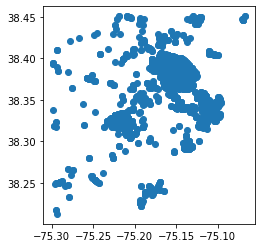

In [119]:
full_sp.plot()

<AxesSubplot:>

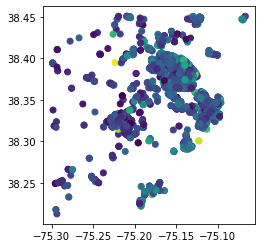

In [120]:
full_sp.plot(column = 'pr_sq_ft')

<AxesSubplot:>

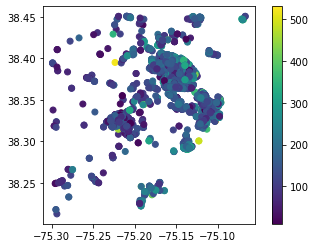

In [121]:
fig, ax = plt.subplots(1,1)
full_sp.plot(column = 'pr_sq_ft',
            ax=ax, legend = True)

<AxesSubplot:>

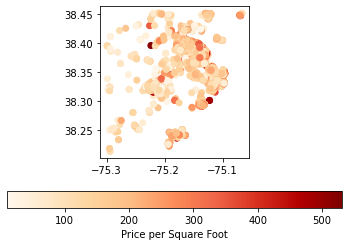

In [122]:
fig, ax = plt.subplots(1,1)
full_sp.plot(column = 'pr_sq_ft',
            ax=ax, 
            legend = True,
            cmap = 'OrRd', 
            legend_kwds = {'label':"Price per Square Foot",
                          'orientation':"horizontal"})

In [123]:
pip install scikit-gstat

Note: you may need to restart the kernel to use updated packages.


In [124]:
import skgstat as skg

In [125]:
coords = full_sp[['x_x', 'y_x']]

In [126]:
len(coords)

4086

In [127]:
len(full_sp.pr_sq_ft)

4086

In [128]:
V = skg.Variogram(coords, full_sp.pr_sq_ft, normalize=True, 
                  n_lags = 10, maxlag=0.5 , bin_func = 'uniform' , 
                  verbose = True ,use_nugget = True)

/Users/emilmella/opt/anaconda3/envs/Lab2_AdvGIS/lib/python3.8/site-packages/skgstat/plotting/variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


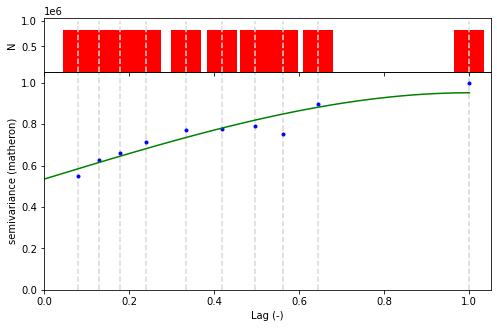

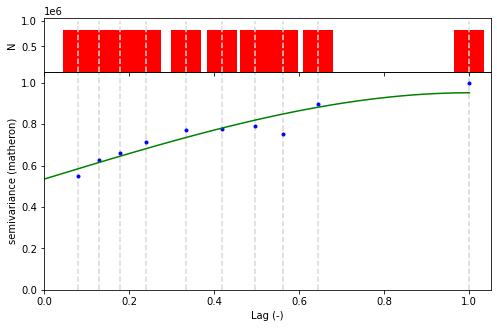

In [129]:
V.plot()

In [130]:
print(V)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   0.16
Sill:              2458.80
Nugget:            3154.77
        


In [131]:
range_dist = lps.weights.DistanceBand.from_dataframe(full_sp, threshold = 0.162)

In [132]:
price = full_sp.pr_sq_ft

In [133]:
#pip install esda

In [134]:
from esda.moran import Moran

In [135]:
moran = Moran(price, range_dist)

In [136]:
moran.I

0.0026950855075168257

In [137]:
pip install splot

Note: you may need to restart the kernel to use updated packages.


In [138]:
from splot.esda import moran_scatterplot

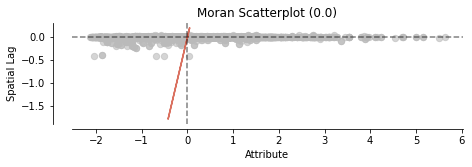

In [139]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

In [140]:
from splot.esda import plot_moran

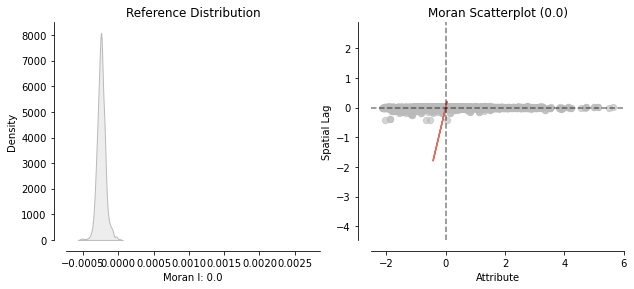

In [141]:
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [142]:
moran.p_sim

0.001

In [143]:
from esda.moran import Moran_Local

In [ ]:
moran_loc = Moran_Local(price, range_dist)

In [ ]:
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Price')
ax.set_ylabel('Spatial Lag of Price')
plt.show()

In [ ]:
fig, ax = moran_scatterplot(moran_loc, p = 0.05)
ax.set_xlabel('Price')
ax.set_ylabel('Spatial Lag of Price')
plt.show()

In [ ]:
from splot.esda import lisa_cluster

In [ ]:
lisa_cluster(moran_loc, full_sp, p=0.05, figsize = (9,9))
plt.show()

In [ ]:
from splot.esda import plot_local_autocorrelation

In [ ]:
plot_local_autocorrelation(moran_loc, full_sp, price)
plt.show()

In [94]:
fig.savefig('SpatEc - Assignment 9 (Emil Mella Pablo).jpg', dpi=300)

In [74]:
from pysal.model import spreg

/Users/emilmella/opt/anaconda3/envs/Lab2_AdvGIS/lib/python3.8/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(


In [75]:
full_sp["tractfp"] = full_sp["tractfp"].astype('category')

In [76]:
full_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4086 entries, 0 to 4085
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             4086 non-null   int64   
 1   c1_high        4086 non-null   float64 
 2   c2_high        4086 non-null   float64 
 3   c3_high        4086 non-null   float64 
 4   c4_high        4086 non-null   float64 
 5   water_diff     4086 non-null   float64 
 6   pr_sq_ft       4086 non-null   float64 
 7   fsid           4086 non-null   int64   
 8   saleyear       4086 non-null   int64   
 9   x_x            4086 non-null   float64 
 10  y_x            4086 non-null   float64 
 11  samp_pr05      4047 non-null   float64 
 12  tractfp        4086 non-null   category
 13  arealotacres   4086 non-null   float64 
 14  areabuilding   4086 non-null   int64   
 15  bedroomscount  4086 non-null   int64   
 16  yearbuilt      4086 non-null   int64   
 17  unitscount     4086 non-n

In [77]:
full_sp['years'] = full_sp['saleyear'] - 2005

In [78]:
full_sp['elev_wat_yr'] = full_sp['water_diff'] * full_sp['years']

In [79]:
full_sp = full_sp.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [80]:
full_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4047 entries, 0 to 4085
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             4047 non-null   int64   
 1   c1_high        4047 non-null   float64 
 2   c2_high        4047 non-null   float64 
 3   c3_high        4047 non-null   float64 
 4   c4_high        4047 non-null   float64 
 5   water_diff     4047 non-null   float64 
 6   pr_sq_ft       4047 non-null   float64 
 7   fsid           4047 non-null   int64   
 8   saleyear       4047 non-null   int64   
 9   x_x            4047 non-null   float64 
 10  y_x            4047 non-null   float64 
 11  samp_pr05      4047 non-null   float64 
 12  tractfp        4047 non-null   category
 13  arealotacres   4047 non-null   float64 
 14  areabuilding   4047 non-null   int64   
 15  bedroomscount  4047 non-null   int64   
 16  yearbuilt      4047 non-null   int64   
 17  unitscount     4047 non-n

In [81]:
x = ['water_diff', 'samp_pr05', 'areabuilding', 'tractfp', 'yearbuilt', 'years', 'elev_wat_yr']

In [82]:
x

['water_diff',
 'samp_pr05',
 'areabuilding',
 'tractfp',
 'yearbuilt',
 'years',
 'elev_wat_yr']

In [83]:
model_ols = spreg.OLS(full_sp[['pr_sq_ft']].values, 
                      full_sp[x].values, 
                      name_y = 'pr_sq_ft', name_x = x)

In [149]:
print(model_ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :    pr_sq_ft                Number of Observations:        4047
Mean dependent var  :    153.4846                Number of Variables   :           8
S.D. dependent var  :     66.8948                Degrees of Freedom    :        4039
R-squared           :      0.0906
Adjusted R-squared  :      0.0891
Sum squared residual:16464311.298                F-statistic           :    250.4334
Sigma-square        :    4076.334                Prob(F-statistic)     :    1.9e-310
S.E. of regression  :      63.846                Log likelihood        :  -22559.701
Sigma-square ML     :    4068.276                Akaike info criterion :   45135.402
S.E of regression ML:     63.7830                Schwarz criterion     :   45185.848

-----------------------------------------------------------------------------

In [84]:
model_sp = spreg.GM_Lag(full_sp[['pr_sq_ft']].values, full_sp[x].values, w = range_dist, name_y = 'pr_sq_ft', name_x = x)

/Users/emilmella/opt/anaconda3/envs/Lab2_AdvGIS/lib/python3.8/site-packages/pysal/model/spreg/user_output.py:456: UserWarning: w must be API-compatible pysal weights object
  warn("w must be API-compatible pysal weights object")


Exception: y must be nx1, and w must be an nxn PySAL W object

In [85]:
print(model_sp.summary)

NameError: name 'model_sp' is not defined